## SQL

In [2]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("ReadCSVExample") \
    .getOrCreate()

orders_df = spark.read.format("parquet").load("Files/transformed_data/orders")
orders_df.show(5)

Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
25/07/30 16:12:47 WARN Utils: Your hostname, Alexs-MacBook-Pro.local, resolves to a loopback address: 127.0.0.1; using 192.168.0.55 instead (on interface en0)
25/07/30 16:12:47 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/07/30 16:12:49 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


+----------------+--------------------+----------+----+-----+---------+---------+--------------------+--------------------+--------+---------+--------+
|SalesOrderNumber|SalesOrderLineNumber| OrderDate|Year|Month|FirstName| LastName|               Email|                Item|Quantity|UnitPrice|     Tax|
+----------------+--------------------+----------+----+-----+---------+---------+--------------------+--------------------+--------+---------+--------+
|         SO49171|                   1|2021-01-01|2021|    1|   Mariah|   Foster|mariah21@adventur...|  Road-250 Black, 48|       1|2181.5625| 174.525|
|         SO49172|                   1|2021-01-01|2021|    1|    Brian|   Howard|brian23@adventure...|    Road-250 Red, 44|       1|  2443.35| 195.468|
|         SO49173|                   1|2021-01-01|2021|    1|    Linda|  Alvarez|linda19@adventure...|Mountain-200 Silv...|       1|2071.4197|165.7136|
|         SO49174|                   1|2021-01-01|2021|    1|     Gina|Hernandez|gina4@a

In [4]:
orders_df.createOrReplaceTempView("my_table")

sqlQuery = "SELECT CAST(YEAR(OrderDate) AS CHAR(4)) AS OrderYear, \
                SUM((UnitPrice * Quantity) + Tax) AS GrossRevenue, \
                COUNT(DISTINCT SalesOrderNumber) AS YearlyCounts \
            FROM my_table \
            GROUP BY CAST(YEAR(OrderDate) AS CHAR(4)) \
            ORDER BY OrderYear"
df_spark = spark.sql(sqlQuery)
df_spark.show()


25/07/30 16:16:49 WARN CharVarcharUtils: The Spark cast operator does not support char/varchar type and simply treats them as string type. Please use string type directly to avoid confusion. Otherwise, you can set spark.sql.legacy.charVarcharAsString to true, so that Spark treat them as string type as same as Spark 3.0 and earlier
25/07/30 16:16:49 WARN CharVarcharUtils: The Spark cast operator does not support char/varchar type and simply treats them as string type. Please use string type directly to avoid confusion. Otherwise, you can set spark.sql.legacy.charVarcharAsString to true, so that Spark treat them as string type as same as Spark 3.0 and earlier


+---------+--------------------+------------+
|OrderYear|        GrossRevenue|YearlyCounts|
+---------+--------------------+------------+
|     2019|  4172169.8502311707|        1201|
|     2020|   6882259.171707153|        2733|
|     2021|1.1547835361394048E7|       12525|
+---------+--------------------+------------+



## Viz

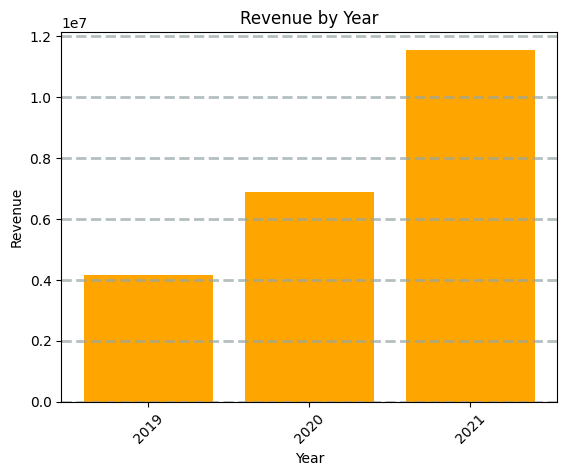

In [8]:
import matplotlib.pyplot as plt

# You need to convert the PySpark dataframe to a Pandas dataframe for visualization
df_sales = df_spark.toPandas()

plt.clf()
plt.bar(x=df_sales['OrderYear'], height=df_sales['GrossRevenue'], color='orange')
plt.title('Revenue by Year')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

<Figure size 640x480 with 0 Axes>

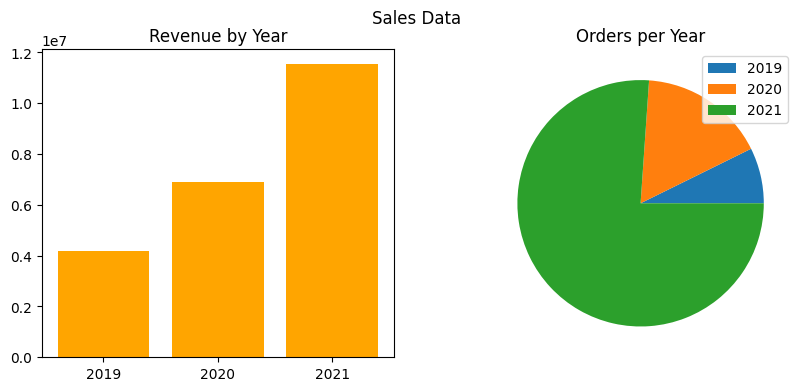

In [9]:
plt.clf()
fig, ax = plt.subplots(1, 2, figsize = (10,4))

ax[0].bar(x=df_sales['OrderYear'], height=df_sales['GrossRevenue'], color='orange')
ax[0].set_title('Revenue by Year')

ax[1].pie(df_sales['YearlyCounts'])
ax[1].set_title('Orders per Year')
ax[1].legend(df_sales['OrderYear'])

fig.suptitle('Sales Data')

plt.show()